# *Intermediate Level Task 2*
Objective: Prediction using Decision Tree  Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st
import os
import seaborn as sns

In [2]:
dataset =pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Visualizing Iris Data

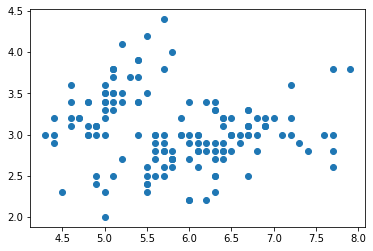

In [6]:
plt.scatter(dataset['SepalLengthCm'],dataset['SepalWidthCm'])
plt.show()

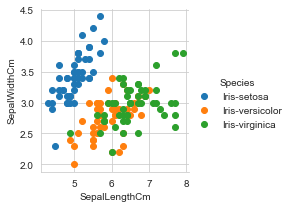

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue = 'Species') \
 .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
 .add_legend()
plt.show()

# Building Classification Model

In [8]:
dataset.drop(['Id'],axis=1,inplace=True)

In [9]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [10]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
X=dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=dataset['Species']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=50)

In [13]:
X_t, X_cv, Y_t, Y_cv = train_test_split(X_train, Y_train, test_size=0.10, random_state=50)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [15]:
classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
classifier.fit(X_t,Y_t)

DecisionTreeClassifier()

[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.663\nsamples = 81\nvalue = [25, 25, 31]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.494\nsamples = 56\nvalue = [0, 25, 31]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.198\nsamples = 27\nvalue = [0, 24, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84

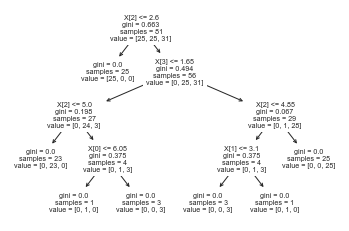

In [16]:
tree.plot_tree(classifier)

# Visualizing Decision Tree using graphviz library

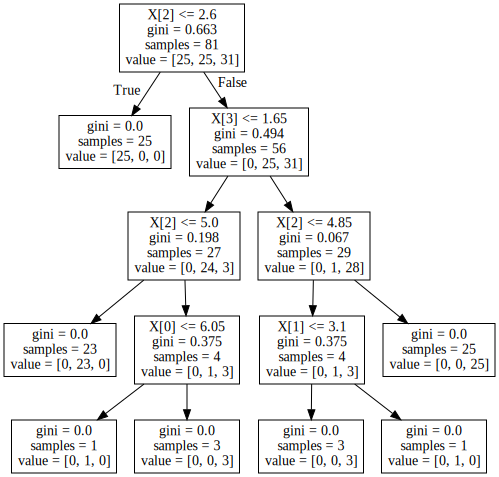

In [17]:
dot_data = tree.export_graphviz(classifier,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [18]:
print('Accuracy : ',cross_val_score(classifier,X_t,Y_t,cv=3,scoring='accuracy').mean())

Accuracy :  0.9382716049382717


In [19]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
Y_hat = classifier.predict(X_cv)

print('Accuracy :',accuracy_score(Y_cv,Y_hat))
multilabel_confusion_matrix(Y_cv,Y_hat)

Accuracy : 1.0


array([[[5, 0],
        [0, 4]],

       [[5, 0],
        [0, 4]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [20]:
YT_hat = classifier.predict(X_test)
YT_hat

print('Model Accuracy Score on totally unseen data(X_test) is: ',accuracy_score(Y_test,YT_hat)*100,'%')
multilabel_confusion_matrix(Y_test,YT_hat)

Model Accuracy Score on totally unseen data(X_test) is:  96.66666666666667 %


array([[[39,  0],
        [ 0, 21]],

       [[38,  1],
        [ 1, 20]],

       [[41,  1],
        [ 1, 17]]], dtype=int64)